# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle. 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [21]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [22]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

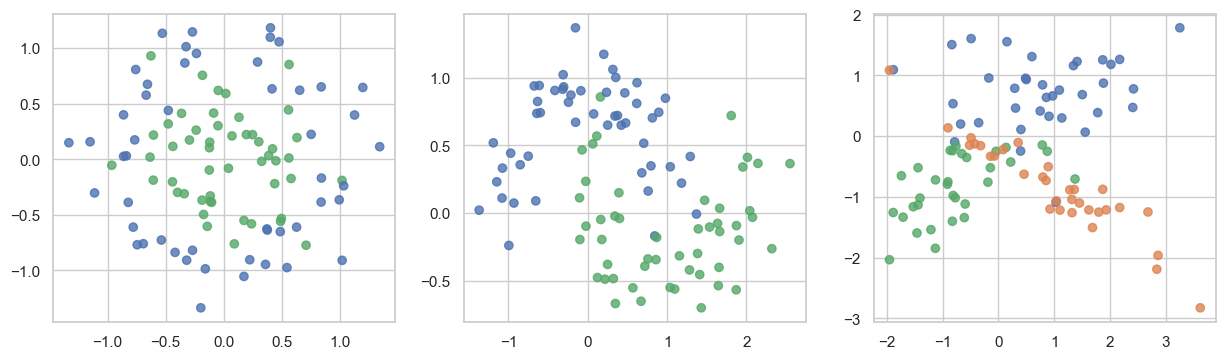

In [23]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [24]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [25]:
def subplot_surface(clf, X, y, ax, title=""):
    plot_step = 0.02
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
               edgecolors=np.array(palette)[y], linewidths=2)
    ax.set_title(title)

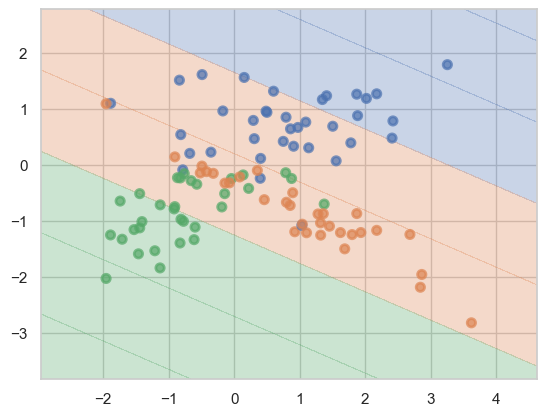

In [26]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset 1:
Train accuracy: 1.0000
Test accuracy: 0.7333
Overfitting: 0.2667


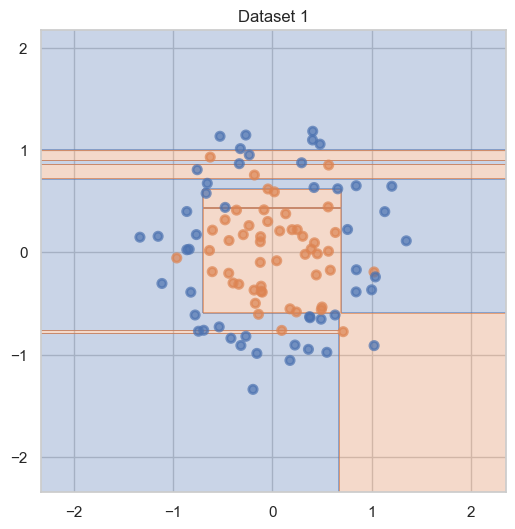

Dataset 2:
Train accuracy: 1.0000
Test accuracy: 0.8667
Overfitting: 0.1333


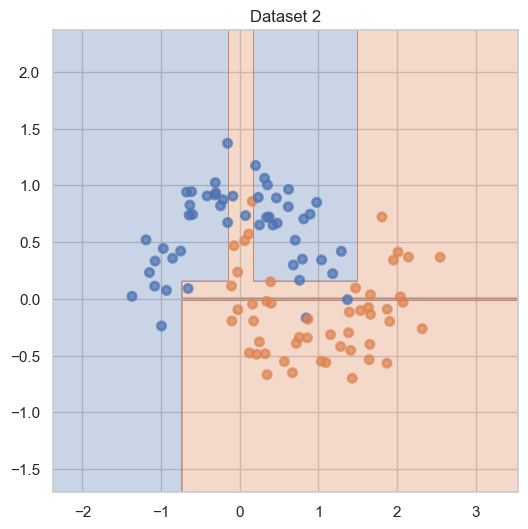

Dataset 3:
Train accuracy: 1.0000
Test accuracy: 0.8333
Overfitting: 0.1667


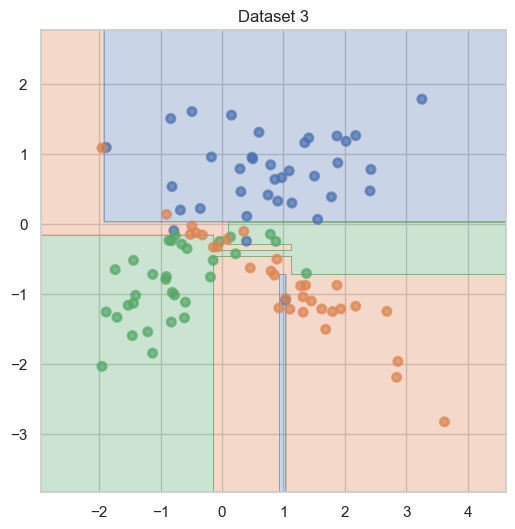

In [28]:
from sklearn.metrics import accuracy_score

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    print(f"Dataset {i+1}:")
    print(f"Train accuracy: {train_accuracy:.4f}")
    print(f"Test accuracy: {test_accuracy:.4f}")
    print(f"Overfitting: {train_accuracy - test_accuracy:.4f}")

    plt.figure(figsize=(6, 6))
    plot_surface(clf, X, y)
    plt.title(f"Dataset {i+1}")
    plt.show()

__Ответ:__

для каждого датасета деревья сильно переобучились. Это видно из графиков (сильно "изрезанные" блоки) и из точности. "Сильно ли?" - да. 0.1(3) это, вроде как, много

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Dataset 1:


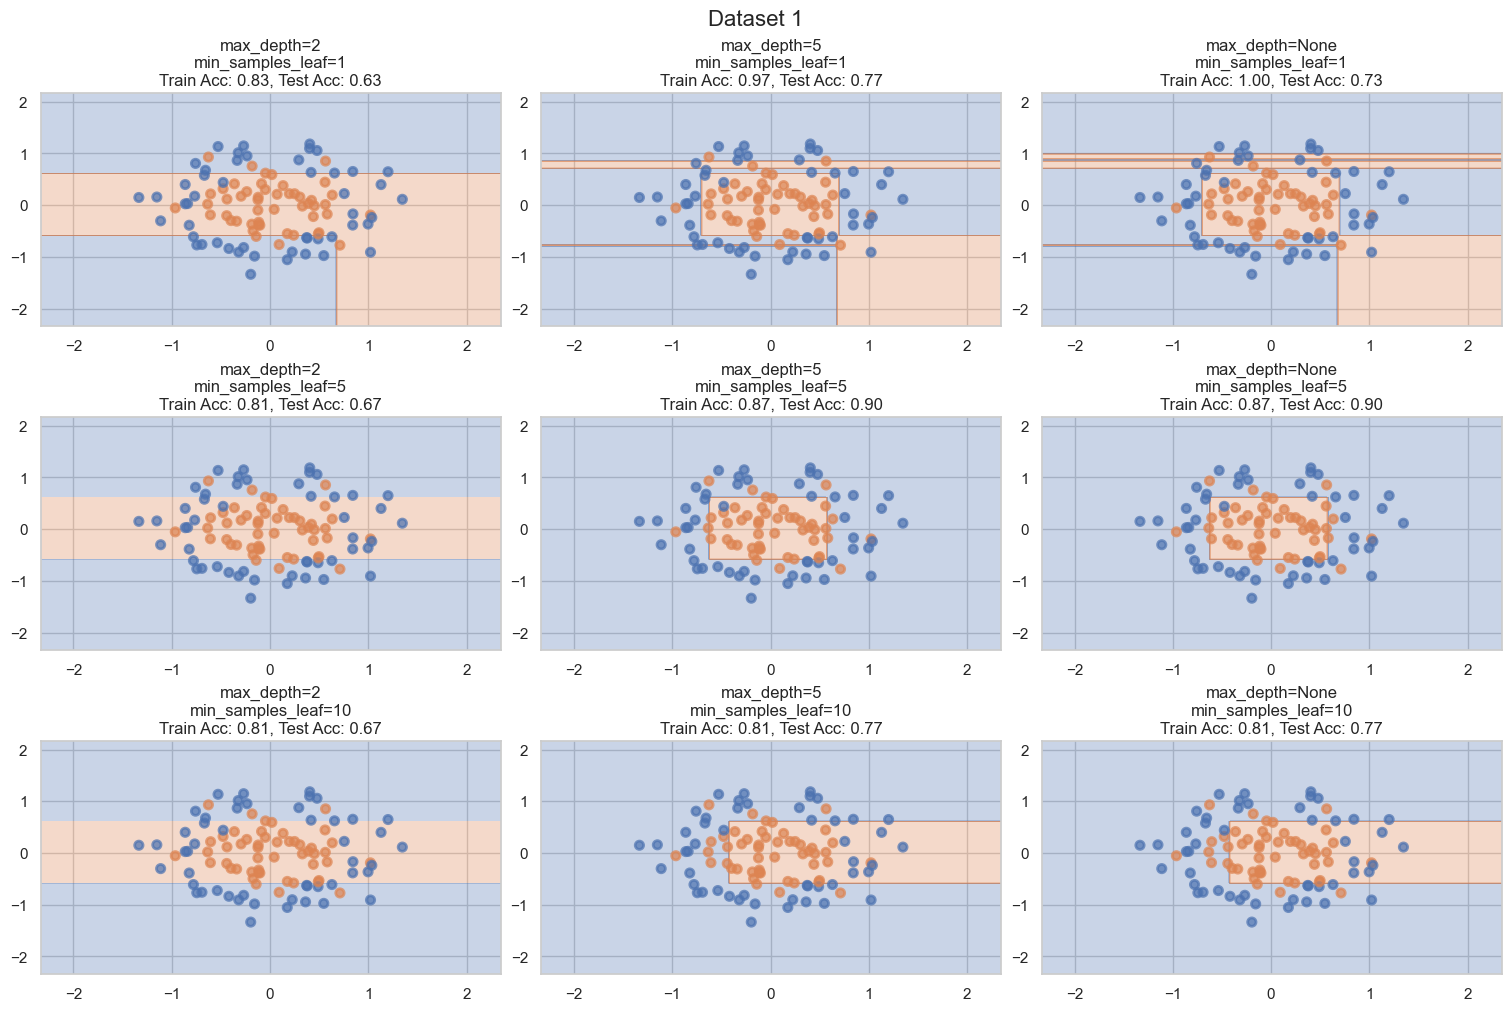

Dataset 2:


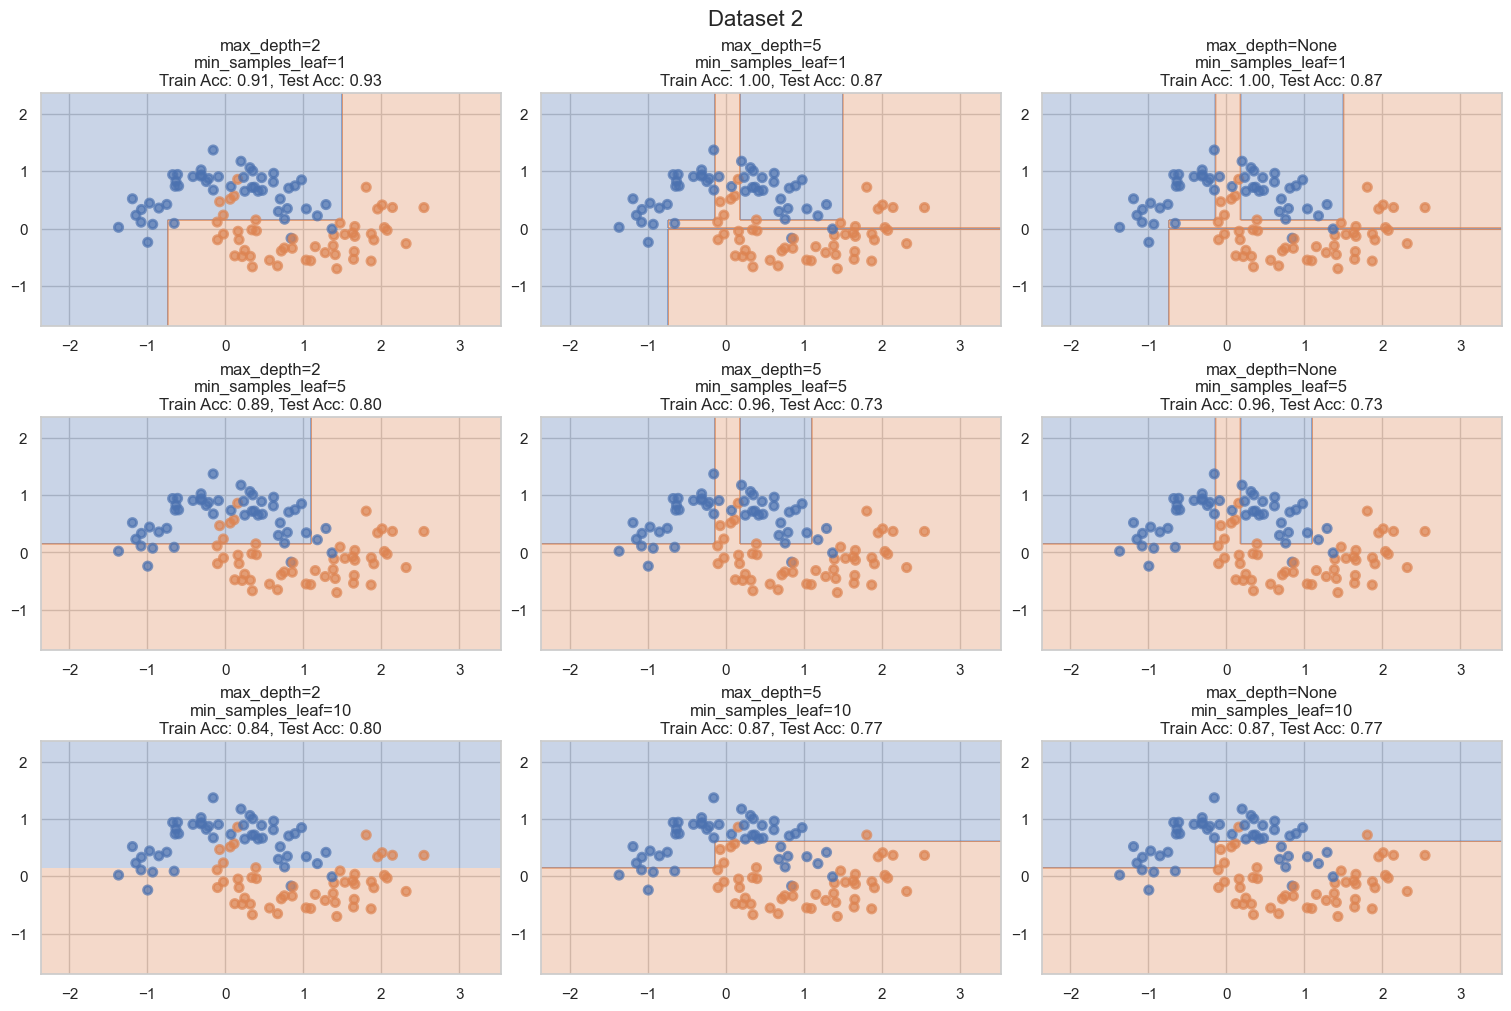

Dataset 3:


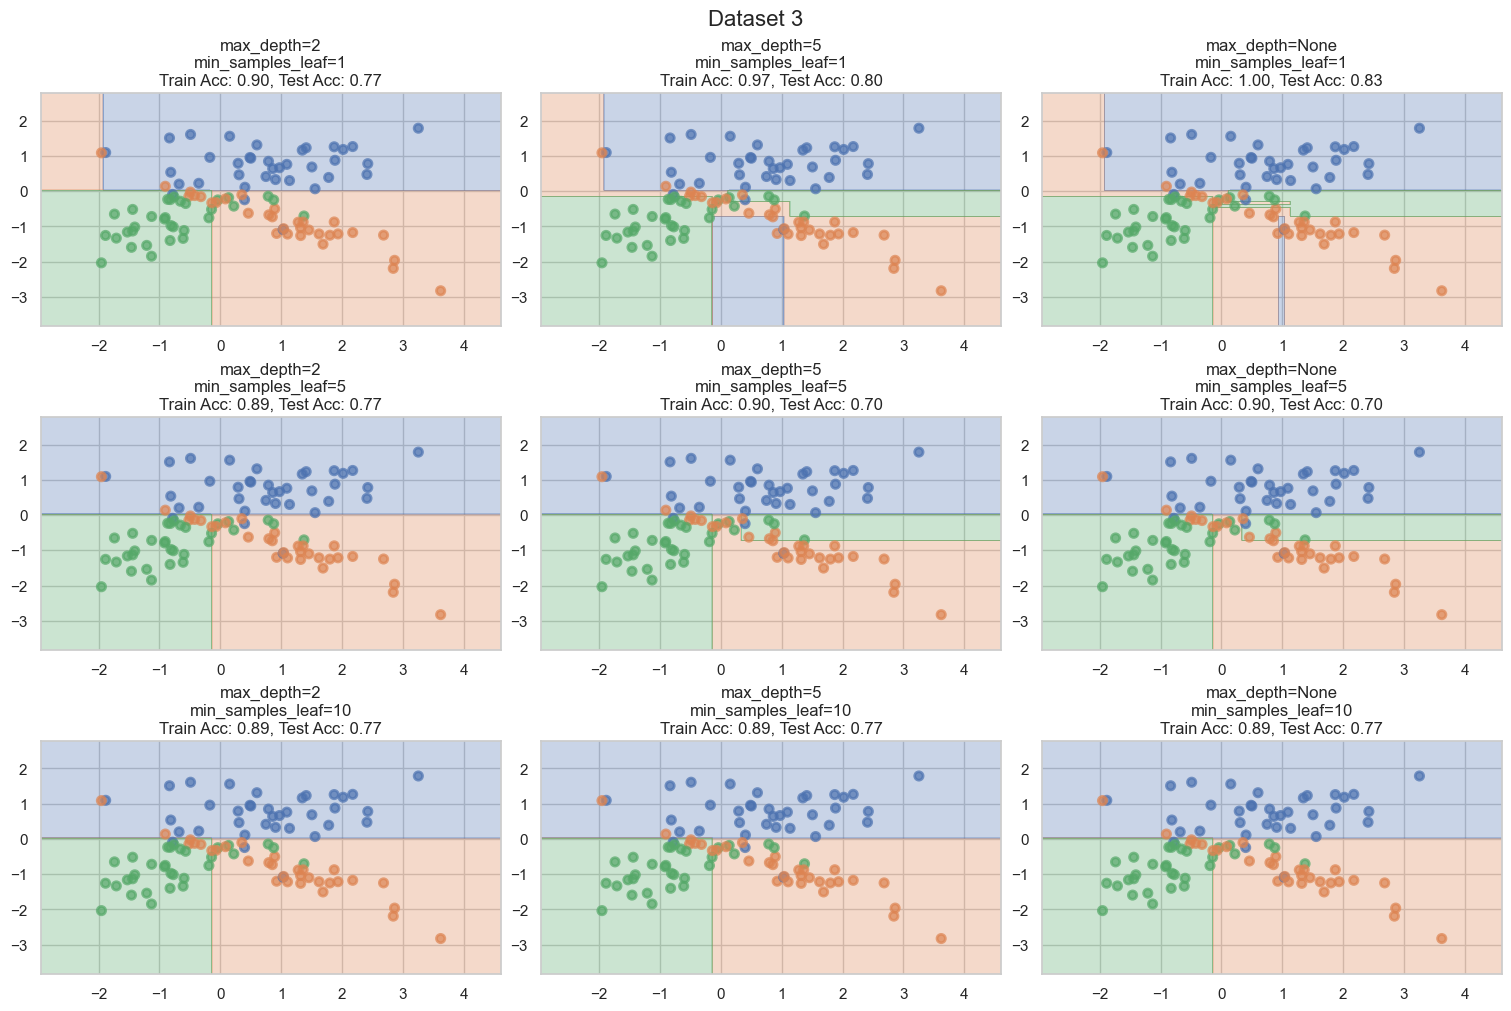

In [30]:
param_grid = {
    'max_depth': [2, 5, None],
    'min_samples_leaf': [1, 5, 10]
}

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    print(f"Dataset {i+1}:")

    fig, axes = plt.subplots(len(param_grid['min_samples_leaf']), len(param_grid['max_depth']),
                             figsize=(15, 10), constrained_layout=True)
    fig.suptitle(f"Dataset {i+1}", fontsize=16)

    for row, min_samples_leaf in enumerate(param_grid['min_samples_leaf']):
        for col, max_depth in enumerate(param_grid['max_depth']):
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
            clf.fit(X_train, y_train)

            y_pred_train = clf.predict(X_train)
            y_pred_test = clf.predict(X_test)
            train_accuracy = accuracy_score(y_train, y_pred_train)
            test_accuracy = accuracy_score(y_test, y_pred_test)

            title = f"max_depth={max_depth}\nmin_samples_leaf={min_samples_leaf}\nTrain Acc: {train_accuracy:.2f}, Test Acc: {test_accuracy:.2f}"
            subplot_surface(clf, X, y, ax=axes[row, col], title=title)

    plt.show()

__Ответ:__

больше max_depth, меньше min_samples_leaf -> более "изрезанные" области

наоборот -> более простые

соответственно на большой глубине и малом min_samples_leaf будет переобучение (усложнение модели)


почему: чем сложнее модель, тем ярче будет проявляться переобучение на плохо разделяемых датасетах (в нашем случае - круги, например), а на хорошо разделяемых данных переобучение будет более терпимое (classifications)


про разницу на датасетах:

на выборке classification различия в точности на тестах между простой моделью и сложной не очень большая в пользу сложной.

на moons - разница чуть больше.

на circles - самая большая разница, причём самая точная модель - "средняя", а на более сложной подтверждается переобучение.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

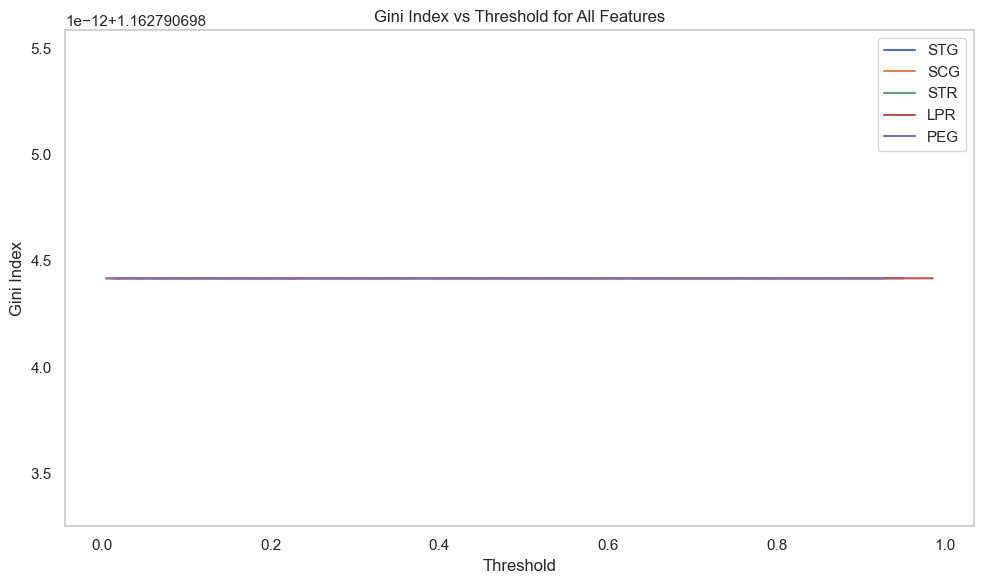

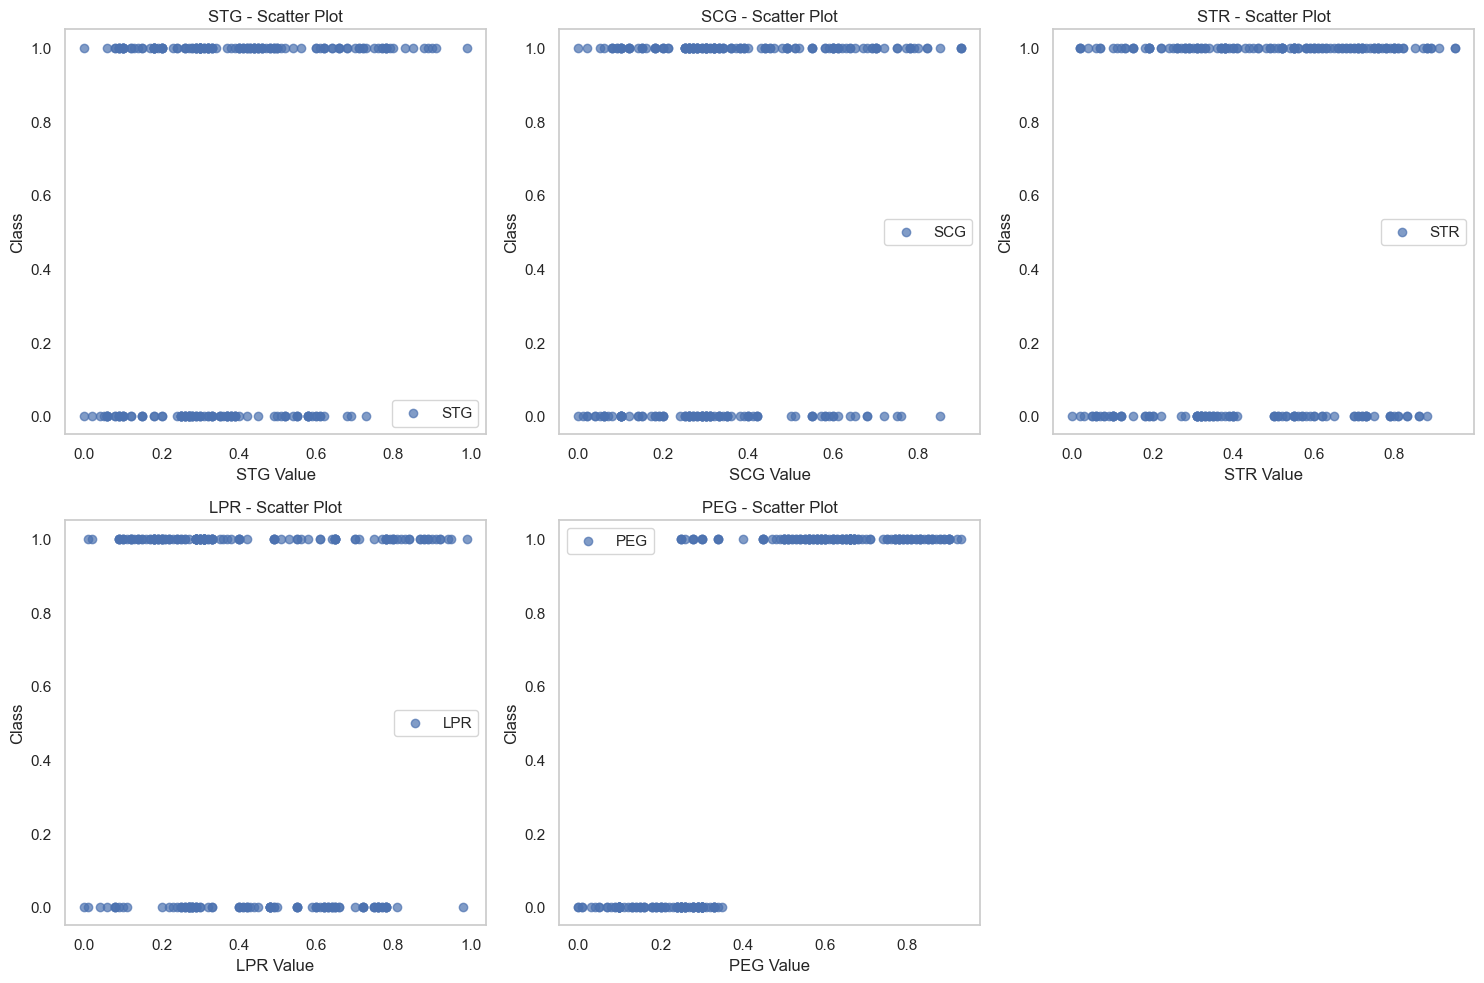

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hw2code import find_best_split

data = pd.read_csv('datasets/students.csv')

features = data.iloc[:, :-1].values
target = data.iloc[:, -1].values

feature_names = data.columns[:-1]

plt.figure(figsize=(10, 6))

for i in range(features.shape[1]):
    feature_vector = features[:, i]
    thresholds, ginis, _, _ = find_best_split(feature_vector, target)

    plt.plot(thresholds, ginis, label=feature_names[i])

plt.title('Gini Index vs Threshold for All Features')
plt.xlabel('Threshold')
plt.ylabel('Gini Index')
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()

plt.figure(figsize=(15, 10))

for i in range(features.shape[1]):
    feature_vector = features[:, i]

    plt.subplot(2, 3, i + 1)
    plt.scatter(feature_vector, target, alpha=0.7, label=feature_names[i])
    plt.title(f'{feature_names[i]} - Scatter Plot')
    plt.xlabel(f'{feature_names[i]} Value')
    plt.ylabel('Class')
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

1) по какому признаку: деление выборки следует производить по признаку, который обеспечивает наибольшее уменьшение значения критерия Джини (наибольший пик на графике). в данном случае это признак PEG.
2) согласуется ли с оценкой scatter-графиков: да. на графике PEG видно, что классы достаточно чётко разделены и мало "перемешаны".
3) вид кривой для хороших признаков: кривая имеет чётко выраженный пик (в идеале, наверное, нормальное распределение), в котором значение критерия Джини сильно выше, чем для других признаков.
4) чем отличаются другие кривые: плоская кривая без заметных сильно выраженных пиков, небольшие колебания.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [33]:
from sklearn.preprocessing import LabelEncoder
from hw2code import DecisionTree

cols = ['class',
        'cap-shape',
        'cap-surface',
        'cap-color',
        'bruises',
        'odor',
        'gill-attachment',
        'gill-spacing',
        'gill-size',
        'gill-color',
        'stalk-shape',
        'stalk-root',
        'stalk-surface-above-ring',
        'stalk-surface-below-ring',
        'stalk-color-above-ring',
        'stalk-color-below-ring',
        'veil-type',
        'veil-color',
        'ring-number',
        'ring-type',
        'spore-print-color',
        'population',
        'habitat']

data = pd.read_csv('datasets/agaricus-lepiota.data', header=None)

encoders = []
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    encoders.append(le)

X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

tree = DecisionTree(['categorical'] * X.shape[1])
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")

Accuracy: 0.9838


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

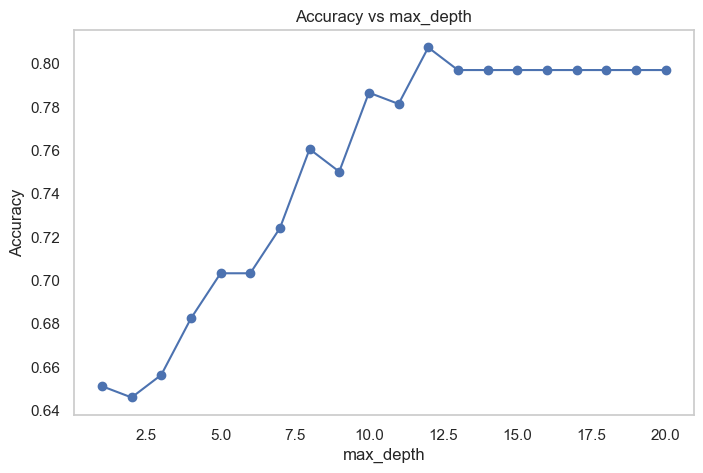

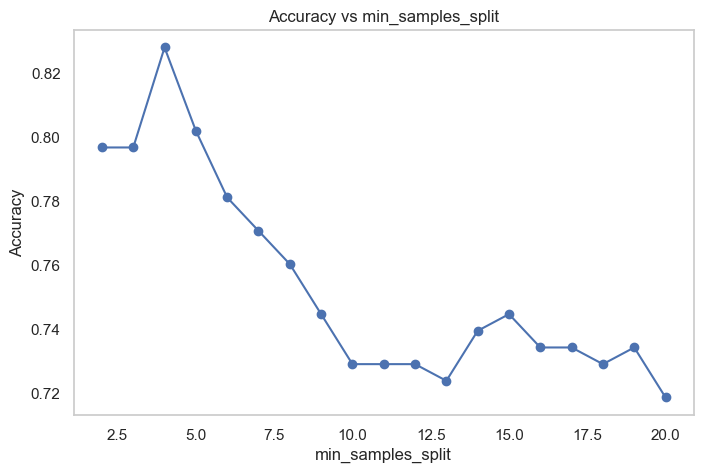

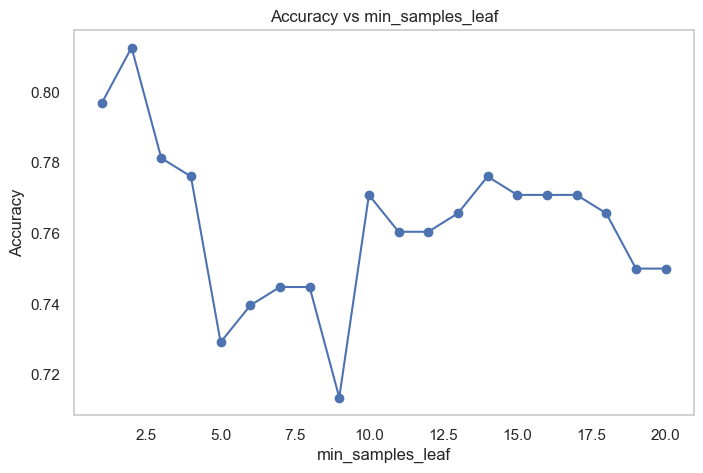

In [34]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

data = pd.read_csv("datasets/tic-tac-toe-endgame.csv")

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


encoders = []
for i in range(X.shape[1]):
    le = LabelEncoder()
    X[:, i] = le.fit_transform(X[:, i])
    encoders.append(le)

le_y = LabelEncoder()
y = le_y.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def plot_acc_vs_param(param_name, param_values):
    accuracies = []
    for value in param_values:
        tree = DecisionTree(
            feature_types=["categorical"] * X.shape[1],
            **{param_name: value}
        )
        tree.fit(X_train, y_train)

        y_pred = tree.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    plt.figure(figsize=(8, 5))
    plt.plot(param_values, accuracies, marker="o")
    plt.title(f"Accuracy vs {param_name}")
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.grid()
    plt.show()

plot_acc_vs_param("max_depth", range(1, 21))
plot_acc_vs_param("min_samples_split", range(2, 21))
plot_acc_vs_param("min_samples_leaf", range(1, 21))

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [41]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder


def preprocess_data(name, url):
    df = pd.read_csv(url, header=None)

    if name == "mushrooms":
        X = df.iloc[:, 1:]
        y = df.iloc[:, 0]
    elif name == "tic_tac_toe":
        X = df.iloc[:, :-1]
        y = df.iloc[:, -1]
    elif name == "cars":
        X = df.iloc[:, :-1]
        y = df.iloc[:, -1].replace({'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1})
    elif name == "nursery":
        X = df.iloc[:, :-1]
        y = df.iloc[:, -1].replace({'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1})

    le = LabelEncoder()
    X = X.apply(le.fit_transform)
    y = le.fit_transform(y) if y.dtype == object else y.values
    return X, y

class DTReal:
    def fit(self, X, y):
        self.clf = DecisionTree(["real"] * X.shape[1])
        self.clf.fit(X.values.astype(float), y)

    def predict(self, X):
        return self.clf.predict(X.values.astype(float))

class DTCategorical:
    def fit(self, X, y):
        self.clf = DecisionTree(["categorical"] * X.shape[1])
        self.clf.fit(X.values, y)

    def predict(self, X):
        return self.clf.predict(X.values)

class DTOneHot:
    def fit(self, X, y):
        self.enc = OneHotEncoder(sparse_output=False)
        X_encoded = self.enc.fit_transform(X)
        self.clf = DecisionTree(["real"] * X_encoded.shape[1])
        self.clf.fit(X_encoded, y)

    def predict(self, X):
        X_encoded = self.enc.transform(X)
        return self.clf.predict(X_encoded)

class SklearnWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model_cls):
        self.model_cls = model_cls

    def fit(self, X, y):
        self.model = self.model_cls()
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)


results = {}
scorer = make_scorer(accuracy_score)

urls = {
    "mushrooms": "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data",
    "tic_tac_toe": "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data",
    "cars": "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",
    "nursery": "https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data"
}

for name, url in urls.items():
    X, y = preprocess_data(name, url)

    real = cross_val_score(SklearnWrapper(DTReal), X, y, cv=10, scoring=scorer).mean()
    categorial = cross_val_score(SklearnWrapper(DTCategorical), X, y, cv=10, scoring=scorer).mean()
    onehot = cross_val_score(SklearnWrapper(DTOneHot), X, y, cv=10, scoring=scorer).mean()
    sk = cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring=scorer).mean()

    results[name] = [real, categorial, onehot, sk]
    print(name)
    print(f"вещественные: {real:.4f}")
    print(f"категориальные: {categorial:.4f}")
    print(f"вещественные + onehotencoding: {onehot:.4f}")
    print(f"sklearn: {sk:.4f}")

mushrooms
вещественные: 0.9897
категориальные: 0.9959
вещественные + onehotencoding: 0.9861
sklearn: 0.9567
tic_tac_toe
вещественные: 0.3857
категориальные: 0.4336
вещественные + onehotencoding: 0.2649
sklearn: 0.7852
cars
вещественные: 0.8864
категориальные: 0.8906
вещественные + onehotencoding: 0.8980
sklearn: 0.9427
nursery
вещественные: 0.8022
категориальные: 0.7776
вещественные + onehotencoding: 0.9989
sklearn: 0.9997


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

алгоритмы ранжируются по-разному для разных наборов. это связано в т.ч. с соотношением числовых и категориальных признаков в каждом датасете, количеством классов в целевой переменной.

случайность: незафиксированный random state, сортировка категорий не стабильна. контрится с помощью кросс-валидации

Вставьте что угодно, описывающее ваши впечатления от этого задания:

анекдот про ступеньки